In [1]:
import numpy as np
np.random.seed(123)
import pandas as pd

## XOR Gate

In [2]:
x1 = np.array([0,0])
y1 = 0
x2 = np.array([0,1])
y2 = 1
x3 = np.array([1,0])
y3 = 1
x4 = np.array([1,1])
y4 = 0

X = np.vstack((x1,x2,x3,x4)).T
Y = np.vstack((y1,y2,y3,y4))

# number of training examples
m = X.shape[1]

In [3]:
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [4]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
m

4

In [6]:
class ANN():
    def __init__(self, theta1 = None, theta2 = None):
        self.theta1 = self.weight_init(2,2)
        self.theta2 = self.weight_init(2,1)
        self.delta1 = np.zeros(self.theta1.shape)
        self.delta2 = np.zeros(self.theta2.shape)
        
    def weight_init(self, s_j,s_j_plus_1):
        '''Returns a weight matrix having (num of nodes in next layer) rows 
        and (num of nodes in current layer +1) columns
        '''
        return np.random.randn(s_j_plus_1, s_j+1)
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def forward_propagate(self,x):
        ########################### FORWARD PASS ####################
        ## Let's create a 3-layer network
        # Layer 1 - 2 nodes (input)
        # Layer 2 - 2 nodes (hidden)
        # Layer 3 - 1 node (output)

        # Layer-1
        self.a_1 = x  # fetch input
        self.a_1 = np.vstack((np.array([+1]),self.a_1)) # add fixed bias to it

        # Layer-2
        self.z_2 = np.matmul(self.theta1,self.a_1)  # compute superposition
        self.a_2 = self.sigmoid(self.z_2)   # compute activation
        self.a_2 = np.vstack((np.array([+1]),self.a_2)) # add fixed bias to activation vector

        # Layer-3
        self.z_3 = np.matmul(self.theta2,self.a_2) #compute superpostion
        self.a_3 = self.sigmoid(self.z_3) # apply activation function
        return self.a_3
        
    def back_propagate(self,y):
        # local error gradient at final layer
        self.del_3 = self.a_3 - y
        # local error gradient at second layer
        self.del_2 = np.matmul(self.theta2.T,self.del_3)*self.a_2*(1-self.a_2)
        self.del_2 = self.del_2[1:,:]

        self.delta2 = self.delta2 + np.matmul(self.del_3,self.a_2.T)
        self.delta1 = self.delta1 + np.matmul(self.del_2,self.a_1.T)
    
    def compute_cost(self,X,Y, lamda = 0):
        m = X.shape[1]
        J = 0
        for t in range(m):
            x = np.array([X[:,t]]).T
            y = np.array([Y[t]])
            J += (-1/m) * ( y*np.log(self.forward_propagate(x)) +  (1-y)* np.log(1- self.forward_propagate(x)) )
        J += (lamda/(2*m))*np.sum(np.sum(self.theta1**2))
        J += (lamda/(2*m))*np.sum(np.sum(self.theta2**2))
        return J[0][0]
    
    def compute_gradient(self,X,Y, lamda = 0):
        m = X.shape[1]
        for t in range(m):
            x = np.array([X[:,t]]).T
            y = np.array([Y[t]])
        
            self.forward_propagate(x)
            self.back_propagate(y)
            
        grad_theta1 = (1/m) * (self.delta1  + lamda*self.theta1)
        grad_theta1[0,:] = (1/m) * self.delta1[0,:]
        
        grad_theta2 = (1/m) * (self.delta2  + lamda*self.theta2)
        grad_theta2[0,:] = (1/m) * self.delta2[0,:]
        
        return grad_theta1, grad_theta2
    
    def gradient_descent(self, X, Y, alpha =0.001, num_iters = 1000, tol = 1e-2, lamda = 0):
        J_history = []
        for iteration in range(num_iters):
            J_history.append(self.compute_cost(X,Y, lamda))
            if abs(J_history[-1])<tol:
                break
            grad_theta1, grad_theta2 = self.compute_gradient(X,Y, lamda)
            self.theta1 = self.theta1 - alpha*grad_theta1
            self.theta2 = self.theta2 - alpha*grad_theta2
        
        return J_history

In [22]:
clf = ANN()
clf.theta1

array([[0.02968323, 1.06931597, 0.89070639],
       [1.75488618, 1.49564414, 1.06939267]])

<AxesSubplot:>

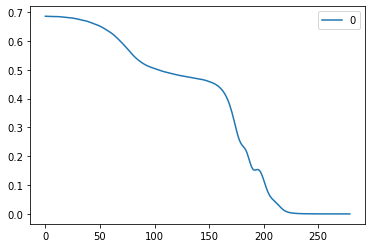

In [23]:
J_history = clf.gradient_descent(X,Y, alpha = 0.1, num_iters = 1000, tol = 1e-5, lamda = 0)
pd.DataFrame(J_history).plot()

In [24]:
for t in range(m):
    
    print('Predicted label of \n{} is \n{}'.format(np.array([X[:,t]]).T,clf.forward_propagate(np.array([X[:,t]]).T)) )

Predicted label of 
[[0]
 [0]] is 
[[2.12415223e-06]]
Predicted label of 
[[0]
 [1]] is 
[[0.99999873]]
Predicted label of 
[[1]
 [0]] is 
[[0.99996919]]
Predicted label of 
[[1]
 [1]] is 
[[5.44091602e-06]]
